# Search Lab

Implementation of search algorithms and search problems for AIMA. 


## CONTENTS

* Overview
* Route Finding Problem
* 8 Puzzle Problems
* Algorithm Comparison and plotting


## OVERVIEW

Here, we learn about a specific kind of problem solving - building goal-based agents that can plan ahead to solve problems. In particular, we examine navigation problem/route finding problem. We must begin by precisely defining **problems** and their **solutions**. We will look at several general-purpose search algorithms.

Search algorithms can be classified into two types:

* **Uninformed search algorithms**: Search algorithms which explore the search space without having any information about the problem other than its definition.
    * Examples:
        1. Breadth First tree Search
        2. Depth First tree Search
        3. Depth Limited tree Search


* **Informed search algorithms**: These type of algorithms leverage any information (heuristics, path cost) on the problem to search through the search space to find the solution efficiently.
    * Examples:
        1. Best First Search
        2. Uniform Cost Search
        3. A\* Search

This notebook uses implementations from `searchFAI.py` module. Let's start by importing everything from search module.

In [1]:
from searchFAI import *

## PROBLEM and Node

Let's see how we define a Problem and Node. Please open `searchFAI.py` to see how abstract class `Problem` and `Node` is defined in the search module.

# Problem Domains

Now we turn our attention to defining some problem domains as subclasses of `Problem`.

# Route Finding Problems

 <img style="float: centre;" src="romania.jpg" width="80%"> 

In a `RouteProblem`, the states are names of "cities" (or other locations), like `'A'` for Arad. The actions are also city names; `'Z'` is the action to move to city `'Z'`. The layout of cities is given by a separate data structure, a `Map`, which is a graph where there are vertexes (cities), links between vertexes, distances (costs) of those links (if not specified, the default is 1 for every link), and optionally the 2D (x, y) location of each city can be specified. A `RouteProblem` takes this `Map` as input and allows actions to move between linked cities. The default heuristic is straight-line distance to the goal, or is uniformly zero if locations were not given.

In [2]:
class Map:
    """A map of places in a 2D world: a graph with vertexes and links between them. 
    In `Map(links, locations)`, `links` can be either [(v1, v2)...] pairs, 
    or a {(v1, v2): distance...} dict. Optional `locations` can be {v1: (x, y)} 
    If `directed=False` then for every (v1, v2) link, we add a (v2, v1) link."""

    def __init__(self, links, locations=None, directed=False):
        if not hasattr(links, 'items'): # Distances are 1 by default
            links = {link: 1 for link in links}
        if not directed:
            for (v1, v2) in list(links):
                links[v2, v1] = links[v1, v2]
        self.distances = links
        self.neighbors = multimap(links)
        self.locations = locations or defaultdict(lambda: (0, 0)) #set (0,0) as the default location if argument locations is None

        
def multimap(pairs) -> dict: # '-> dict' means returned value is a dictionary type
    "Given (key, val) pairs, make a dict of {key: [val,...]}."
    result = defaultdict(list)
    for key0, key1 in pairs: #for every key(type=>tuple) in pairs
        result[key0].append(key1)
    return result

In [3]:
class RouteProblem(Problem):
    """A problem to find a route between locations on a `Map`.
    Create a problem with RouteProblem(start, goal, map=Map(...)}).
    States are the vertexes in the Map graph; actions are destination states."""
    
    def actions(self, state): 
        """The places neighboring `state`."""
        return self.map.neighbors[state] 
    
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action if action in self.map.neighbors[state] else state #go to the neibour city or stay at the current city
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        return self.map.distances[s, s1]
    
    def h(self, node):
        "Straight-line distance between state and the goal."
        locs = self.map.locations
        return straight_line_distance(locs[node.state], locs[self.goal])
    
    
def straight_line_distance(A, B):
    "Straight-line distance between two points."
    return sum(abs(a - b)**2 for (a, b) in zip(A, B)) ** 0.5

In [4]:
# Some specific RouteProblems
romania_links = {('O', 'Z'):  71, ('O', 'S'): 151, ('A', 'Z'): 75, ('A', 'S'): 140, ('A', 'T'): 118, 
     ('L', 'T'): 111, ('L', 'M'):  70, ('D', 'M'): 75, ('C', 'D'): 120, ('C', 'R'): 146, 
     ('C', 'P'): 138, ('R', 'S'):  80, ('F', 'S'): 99, ('B', 'F'): 211, ('B', 'P'): 101, 
     ('B', 'G'):  90, ('B', 'U'):  85, ('H', 'U'): 98, ('E', 'H'):  86, ('U', 'V'): 142, 
     ('I', 'V'):  92, ('I', 'N'):  87, ('P', 'R'): 97} #dictionary

romania_link_same = [('O', 'Z'), ('O', 'S'), ('A', 'Z'), ('A', 'S'), ('A', 'T'), 
     ('L', 'T'), ('L', 'M'), ('D', 'M'), ('C', 'D'), ('C', 'R'), 
     ('C', 'P'), ('R', 'S'), ('F', 'S'), ('B', 'F'), ('B', 'P'), ('B', 'G'), ('B', 'U'), ('H', 'U'),
     ('E', 'H'), ('U', 'V'), ('I', 'V'), ('I', 'N'), ('P', 'R')] # list, same_weighted_link

romania_locations = {'A': ( 76, 497), 'B': (400, 327), 'C': (246, 285), 'D': (160, 296), 'E': (558, 294), 
     'F': (285, 460), 'G': (368, 257), 'H': (548, 355), 'I': (488, 535), 'L': (162, 379),
     'M': (160, 343), 'N': (407, 561), 'O': (117, 580), 'P': (311, 372), 'R': (227, 412),
     'S': (187, 463), 'T': ( 83, 414), 'U': (471, 363), 'V': (535, 473), 'Z': (92, 539)} #dictionary, values are the coordinate of each sity


romania = Map(romania_links,romania_locations)

r0 = RouteProblem('A', 'A', map=romania) #initial state = 'A', goal state = 'A'
r1 = RouteProblem('A', 'B', map=romania) 
r2 = RouteProblem('N', 'L', map=romania)
r3 = RouteProblem('E', 'T', map=romania)
r4 = RouteProblem('S', 'R', map=romania)
r5 = RouteProblem('S', 'B', map=romania)
r6 = RouteProblem('S', 'F', map=romania)


In [5]:
path_states(uniform_cost_search(r1)) # Lowest-cost path from Arab to Bucharest

['A', 'S', 'R', 'P', 'B']

In [6]:
path_states(breadth_first_tree_search(r1))

['A', 'S', 'F', 'B']

In [7]:
path_states(depth_first_tree_search(r1))

['A', 'T', 'L', 'M', 'D', 'C', 'P', 'B']

In [8]:
path_states(astar_tree_search(r1))

['A', 'S', 'R', 'P', 'B']

In [9]:
path_actions(astar_tree_search(r1))


['S', 'R', 'P', 'B']

# 8 Puzzle Problems

![](https://ece.uwaterloo.ca/~dwharder/aads/Algorithms/N_puzzles/images/puz3.png)

A sliding tile puzzle where you can swap the blank with an adjacent piece, trying to reach a goal configuration. The cells are numbered 0 to 8, starting at the top left and going row by row left to right. The pieces are numebred 1 to 8, with 0 representing the blank. An action is the cell index number that is to be swapped with the blank (*not* the actual number to be swapped but the index into the state). So the diagram above left is the state `(5, 2, 7, 8, 4, 0, 1, 3, 6)`, and the action is `8`, because the cell number 8 (the 9th or last cell, the `6` in the bottom right) is swapped with the blank.

**Note**: There are two disjoint sets of states that cannot be reached from each other. One set has an even number of "inversions"; the other has an odd number. An inversion is when a piece in the state is larger than a piece that follows it. Take for examples, the left diagram has **15** inversions, the right diagram has **17** inversions. 

In [10]:
class EightPuzzle(Problem):
    """ The problem of sliding tiles numbered from 1 to 8 on a 3x3 board,
    where one of the squares is a blank, trying to reach a goal configuration.
    A board state is represented as a tuple of length 9, where the element at index i 
    represents the tile number at index i, or 0 if for the empty square, e.g. the goal:
        1 2 3
        4 5 6 ==> (1, 2, 3, 4, 5, 6, 7, 8, 0)
        7 8 _
    """

    def __init__(self, initial, goal=(0, 1, 2, 3, 4, 5, 6, 7, 8)):
        assert inversions(initial) % 2 == inversions(goal) % 2 # Parity check, assert expression => if not expression: raise AssertionError
        self.initial, self.goal = initial, goal
    
    def actions(self, state):
        """The indexes of the squares that the blank can move to."""
        moves = ((1, 3),    (0, 2, 4),    (1, 5),
                 (0, 4, 6), (1, 3, 5, 7), (2, 4, 8),
                 (3, 7),    (4, 6, 8),    (7, 5))
        blank = state.index(0)
        return moves[blank]
    
    def result(self, state, action):
        """Swap the blank with the square numbered `action`."""
        s = list(state) #convert the state from tuple into list s
        blank = state.index(0)
        s[action], s[blank] = s[blank], s[action]
        return tuple(s) #convert the state back into tuple
    
    def h1(self, node):
        """The misplaced tiles heuristic."""
        return hamming_distance(node.state, self.goal)
    
    def h2(self, node):
        """The Manhattan heuristic."""
        X = (0, 1, 2, 0, 1, 2, 0, 1, 2) #x coordinate of goal state 0,1,2,3,4,5,6,7,8
        Y = (0, 0, 0, 1, 1, 1, 2, 2, 2) #y coordinate of goal state 0,1,2,3,4,5,6,7,8
        return sum(abs(X[s] - X[g]) + abs(Y[s] - Y[g])
                   for (s, g) in zip(node.state, self.goal) if s != 0)
    
    def h(self, node): return self.h1(node) 
    
    
def hamming_distance(A, B):
    "Number of positions where vectors A and B are different."
    return sum(a != b for a, b in zip(A, B))
    

def inversions(board):
    "The number of times a piece is a smaller number than a following piece."
    return sum((a > b and a != 0 and b != 0) for (a, b) in combinations(board, 2))
    
    
def board8(board, fmt=(3 * '{} {} {}\n')):
    "A string representing an 8-puzzle board"
    return fmt.format(*board).replace('0', '_') # *board => treat board as 9 arguments

In [11]:
# Some specific EightPuzzle problems

e1 = EightPuzzle((1, 4, 2, 0, 7, 5, 3, 6, 8))
e2 = EightPuzzle((1, 2, 3, 4, 5, 6, 7, 8, 0))
e3 = EightPuzzle((4, 0, 2, 5, 1, 3, 7, 8, 6))
e4 = EightPuzzle((7, 2, 4, 5, 0, 6, 8, 3, 1))
e5 = EightPuzzle((8, 6, 7, 2, 5, 4, 3, 0, 1))

In [12]:
# Solve an 8 puzzle problem and print out each state
for s in path_states (astar_tree_search(e1)):
    print(board8(s))

1 4 2
_ 7 5
3 6 8

1 4 2
3 7 5
_ 6 8

1 4 2
3 7 5
6 _ 8

1 4 2
3 _ 5
6 7 8

1 _ 2
3 4 5
6 7 8

_ 1 2
3 4 5
6 7 8



# Reporting Summary Statistics on Search Algorithms

Now let's gather some metrics on how well each algorithm does.  We'll use `CountCalls` to wrap a `Problem` object in such a way that calls to its methods are delegated to the original problem, but each call increments a counter. Once we've solved the problem, we print out summary statistics.

Generate report on statistics in terms of number of nodes discovered, number of goal test, total path cost and number of actions against different search algorithms and problem settings.

In [13]:
class CountCalls:
    """Delegate all attribute gets to the object, and count them in ._counts"""
    def __init__(self, obj):
        self._object = obj
        self._counts = Counter() #the self._counts will count number of times each methods has been used.
        
    def __getattr__(self, attr):
        "Delegate to the original object, after incrementing a counter."
        self._counts[attr] += 1
        return getattr(self._object, attr)

        
def report(searchers, problems, verbose=True):
    """Show summary statistics for each searcher (and on each problem unless verbose is false)."""
    show_stat = {};
    for searcher in searchers:
        print(searcher.__name__ + ':')
        total_counts = Counter()
        for p in problems:
            prob   = CountCalls(p)
            soln   = searcher(prob) # run problem p with current searcher, 
            counts = prob._counts; 
            counts.update(path_actions=len(soln), path_cost=soln.path_cost) 
            total_counts += counts
            if verbose: report_counts(counts, str(p)[:40])
        report_counts(total_counts, 'TOTAL\n')

        show_stat[searcher.__name__] = [total_counts['result'],total_counts['is_goal'],total_counts['path_actions']]
    return show_stat
        
def report_counts(counts, name):
    """Print one line of the counts report."""
    print('{:9,d} nodes |{:9,d} goal |{:8.0f} path cost |{:8,d} path actions | {}'.format(
          counts['result'], counts['is_goal'], counts['path_cost'], counts['path_actions'], name)) 


In [14]:
show_stat = report([uniform_cost_search, astar_tree_search], [r0,r1,r2,r3])

uniform_cost_search:
        0 nodes |        1 goal |       0 path cost |       0 path actions | RouteProblem('A', 'A')
       43 nodes |       18 goal |     418 path cost |       4 path actions | RouteProblem('A', 'B')
       73 nodes |       30 goal |     910 path cost |       9 path actions | RouteProblem('N', 'L')
       79 nodes |       33 goal |     805 path cost |       8 path actions | RouteProblem('E', 'T')
      195 nodes |       82 goal |    2133 path cost |      21 path actions | TOTAL

astar_tree_search:
        0 nodes |        1 goal |       0 path cost |       0 path actions | RouteProblem('A', 'A')
       15 nodes |        6 goal |     418 path cost |       4 path actions | RouteProblem('A', 'B')
       47 nodes |       19 goal |     910 path cost |       9 path actions | RouteProblem('N', 'L')
       46 nodes |       18 goal |     805 path cost |       8 path actions | RouteProblem('E', 'T')
      108 nodes |       44 goal |    2133 path cost |      21 path actions |

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def show_bar(show_stat):
    columns = ('nodes','goal','actions')
    rows = ['%s' % x for x in show_stat.keys() ]
    
    values = np.arange(0, 100, 25)
    value_increment = 5
   
    # Get some pastel shades for the colors
    colors = plt.cm.BuPu(np.linspace(0.5, 1, len(show_stat)))
    n_rows = len(show_stat)

    index = np.arange(len(columns)) + 0.3
    bar_width = 0.1

    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(columns))

    # Plot bars and create text labels for the table
    cell_text = []
    for row in range(n_rows):
        index = index+0.1
        plt.bar(index, show_stat[rows[row]], bar_width, bottom=0, color=colors[row],edgecolor = 'white')
    
        #y_offset = y_offset + show_stat[rows[row]]
        y_offset =show_stat[rows[row]]
        cell_text.append(['%1.1f' % (x ) for x in y_offset])
    
    # Reverse colors and text labels to display the last value at the top.
    colors = colors[::1]
   # cell_text.reverse()
    
    # Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')
    
    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.ylabel("search comparison")
 #   plt.yticks(values * value_increment, ['%d' % val for val in values])
    plt.xticks([])
    plt.title('search criteria')

    plt.show()

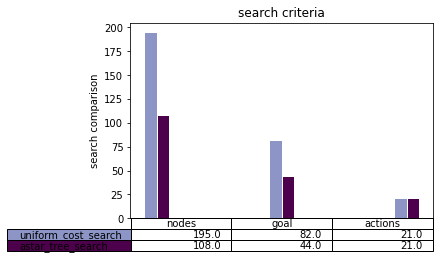

In [16]:
show_bar(show_stat)

# Excercise

## Q1: Try to implementation the `greedy_tree_search` 

## Q2: Initialize a romania map problem with Initial state = Arad and Goal state = Giurgiu. Use BFS, DFS, UCS, A* and Greedy search to solve the problem. Print out the routes generated by each search algorithm. Use markdown cell to answer what is the optimal solution in given problem, and which algorithms will surely generate optimal solutions. 

## Q3: Try to solve 8 puzzle game problem with a different goal state (1,2,3,8,0,4,7,6,5)

## Q4:Try to use Manhattan Distance as the heuristic fubnction to solve the 8 puzzle game problem.